Árvore de decisão
=================



## O algoritmo da árvore de decisão



Árvores de decisão são grafos direcionais. Existem três tipos de vértices nestes grafos:

-   *Vértice raiz*: é um vértice cauda que é ligado a dois vértices cabeça. Em outras palavras, existem duas setas que saem dele e nenhuma seta que chega nele.

-   *Vértice de decisão*: é um vértice que atua como cabeça para outro vértice e como cauda para dois outros vértices cabeça. Em outras palavras, existe uma seta que chega nele e duas setas que saem dele.

-   *Vértice folha*: é um vértice cabeça de um outro vértice. Em outras palavras, existe uma seta que chega nele e nenhuma seta que sai dele.

Na literatura, os vértices de árvores de decisão são comumente chamados de *nós*.

O vértice raiz e os vértices de decisão contém <u>condicionais</u>. Os vértices folha contém um <u>valor de resposta</u>.

Quando uma instância navega por uma árvore de decisão, ela inicia sua trajetória no vértice raiz. Checamos o condicional contido neste vértice. Se o retorno for `True` (verdadeiro) seguimos pela seta da esquerda; se o retorno for `False` (falso) seguimos pela seta da direita.

Sempre após caminhar por uma seta nós checamos em que tipo de vértice estamos. Se é um vértice folha então nós lemos o valor de resposta e encerramos a trajetória. Se é um vértice de decisão, devemos checar o condicional contido neste vértice. Se o retorno for `True` (verdadeiro) seguimos pela seta da esquerda; se o retorno for `False` (falso) seguimos pela seta da direita. Após caminhar por uma seta nós repetimos o procedimento até que um vértice folha seja encontrado.

Como pode ver, árvores de decisão misturam conceitos de grafos e de recursão.

Para uma fundamentação teórica mais aprofundada, leia as páginas 78 a 96 do livro [FACELI, Katti; LORENA, AC; GAMA, João; et al. Inteligência Artificial: uma abordagem de Aprendizado de Máquina. 2. ed., 2021]. Vale a pena também assistir ao vídeo sobre o tema do [StatQuest](https://youtu.be/g9c66TUylZ4).

Para usar o `scikit-learn` para treinar um modelo árvore de decisão, nós vamos seguir o mesmo procedimento que usamos no notebook sobre modelo linear (se não leu ele, é recomendado parar aqui e retornar após a leitura).

Vamos primeiro carregar os dados.



In [1]:
import seaborn as sns
from sklearn.model_selection import train_test_split

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 61455
DATASET_NAME = "diamonds"
FEATURES = ["carat", "depth", "table", "x", "y", "z"]
TARGET = ["price"]

df = sns.load_dataset(DATASET_NAME)

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

# observe que usamos o .values aqui pois queremos apenas os valores
X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values
X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values

Agora vamos treinar o modelo! Note que passamos o valor da semente aleatória para o argumento `random_state` na hora que criamos o modelo com a classe `DecisionTreeRegressor`. Fizemos isso aqui pois o algoritmo de induzir árvores de decisão que usamos *não é determinístico*! Induzir *a melhor* árvore de decisão para um conjunto de dados (o que é um processo determinístico) é um problema NP-difícil. Sendo assim, os algoritmos usados usam estratégias de busca que não exploram todo o espaço amostral. Desta forma, os algoritmos encontram soluções razoáveis, mas não *a melhor* solução. Este processo torna o algoritmo de indução não-determinístico e por isso estamos usando uma semente aleatória aqui para ser reprodutível. Se você não está preocupado com reprodutibilidade, não é necessário passar o argumento `random_state`.



In [2]:
from sklearn.tree import DecisionTreeRegressor

# cria o modelo
modelo_dt = DecisionTreeRegressor(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_dt.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_dt.predict(X_teste)
print(previsao)

[1162.  576. 1061. ...  459.  990.  833.]


Vamos checar a performance do nosso modelo de árvore de decisão.



In [3]:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_teste
y_previsao = modelo_dt.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo árvore de decisão foi de {RMSE} dólares.")

O RMSE do modelo árvore de decisão foi de 1906.0888887373405 dólares.


O RMSE do modelo de árvore de decisão foi de 1906 dólares, o que é pior do que o RMSE do modelo linear que foi de 1477 dólares&#x2026;



## Convertendo dados ordinais em dados numéricos



Existem 3 colunas do dataset de diamantes que temos que não estamos usando pois são dados categóricos. São as colunas `cut`, `color` e `clarity`. Infelizmente, os modelos que vimos até agora não permitem features numéricas misturadas com features categóricas&#x2026; se quisermos usar a informação contida nestas features vamos ter que convertê-las para dados numéricos.

As três features acima (`cut`, `color` e `clarity`) não são apenas categóricas, mas também são <u>ordinais</u>. Dados categóricos ordinais são aqueles onde os seus rótulos apresentam uma ordem e, por conta disso, faz sentido usarmos operadores relacionais como $<$, $\leq$, $>$ e $\geq$.

Vamos ver quais são os dados contidos na feature `cut` com o método `unique` do `pandas`.



In [4]:
print(df["cut"].unique().tolist())

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']


Vemos que o corte dos diamantes pode ser Ideal, Premium, Very Good, Good ou Fair, sendo que podemos atribuir uma ordem relacional entre a qualidade do corte: Ideal > Premium > Very Good > Good > Fair.

Uma forma simples de converter os dados categóricos em dados numéricos é usando o método `map` do `pandas`.



In [5]:
conversao = {
    "Ideal": 1,
    "Premium": 2,
    "Very Good": 3,
    "Good": 4,
    "Fair": 5,
}

df["cut_num"] = df["cut"].map(conversao)

print(df)

       carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   

      cut_num  
0           1  
1      

Aqui neste caso atribuímos valores de 1 até 5 para os rótulos de Ideal até Fair. Nesta nossa conversão, estamos considerando que quanto menor o valor numérico melhor é o corte. Nada te impede de fazer o contrário! Associar um número maior para o valor Ideal e um número menor para o valor Fair. Tanto faz.

Vamos ver como o modelo se comporta agora com essa informação nova! Primeiro carregamos os dados.



In [6]:
FEATURES = [
    "carat",
    "depth",
    "table",
    "x",
    "y",
    "z",
    "cut_num", # veja que adicionamos a coluna nova aqui!
]

# relembrando que `indices_treino` e `indices_teste` foram gerados acima

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

# observe que usamos o .values aqui pois queremos apenas os valores
X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values
X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values

E agora treinamos o modelo.



In [7]:
modelo_dt = DecisionTreeRegressor(random_state=SEMENTE_ALEATORIA)
modelo_dt.fit(X_treino, y_treino)
previsao = modelo_dt.predict(X_teste)
print(previsao)

[1162.  706.  814. ...  480.  990.  851.]


Vamos checar a performance do nosso modelo de árvore de decisão.



In [8]:
y_verdadeiro = y_teste
y_previsao = modelo_dt.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo árvore de decisão foi de {RMSE} dólares.")

O RMSE do modelo árvore de decisão foi de 1875.5291570893257 dólares.


A performance melhorou marginalmente. Antes tínhamos um RMSE de 1906 dólares e agora é de 1876 dólares. Faz sentido, com mais informação é esperado que o modelo possa encontrar mais padrões nos dados e prever melhor nosso target.

Fica como exercício para o leitor atento fazer o mesmo procedimento para incluir também no treino do modelo a informação categórica contida nas features `color` e `clarity`. Será que isso melhora a previsão do modelo? Algumas informações:

-   A coluna `color` contém letras em caixa alta de D até J, sendo que D é considerada a melhor cor e J a pior.

-   A coluna `clarity` contém strings representando a transparência dos diamantes. Da pior para a melhor: I1, SI2, SI1, VS2, VS1, VVS2, VVS1 e IF.

Como cortesia, a célula para realizar seus cálculos já foi criada abaixo. Não precisa agradecer 😉



## Cuidados com a conversão de dados categóricos em numéricos



*Categorias não são números*. Conversões entre categorias e números podem causar problemas. Por isso, <u>muita atenção</u>!

Modelos simbólicos como árvores de decisão e florestas aleatórias (assunto do próximo notebook) não ligam para a diferença de intensidade dos valores numéricos, apenas querem saber se um valor é maior ou menor que outro. Exemplo: em um vértice raiz ou de decisão, se seu condicional checa se feature *A* é maior que 10, não importa se feature *A* vale 11 ou se ela vale o número de Avogadro, o que importa neste caso é <u>apenas</u> se ela é maior que 10.

Veja que a intensidade dos valores vai *sim* afetar modelos lineares e baseados em distâncias (como o $k$​-NN que nós vimos). Neste caso, a escolha dos valores numéricos usados para a conversão *irá* influenciar a convergência e generalização do seu modelo!

Quando seus dados categóricos <u>não são ordinais</u> você deve usar outra estratégia para convertê-los para números. Por exemplo, se você tem uma feature categórica que os rótulos são Azul, Vermelho e Verde você não pode simplesmente atribuir o valor de Azul = 1, Vermelho = 2 e Verde = 3 pois você está implicando com isso que existe uma ordem relacional entre estas cores. O modelo poderá por exemplo checar se sua cor é maior ou igual a Vermelho, e isso *não faz sentido algum*&#x2026;

Dados não ordinais podem ser convertidos para números usando a estratégia do *one-hot encoder*. Este tópico está fora do escopo deste notebook, mas você pode ler mais sobre isso [aqui](https://datagy.io/sklearn-one-hot-encode/).



## Hiperparâmetros



Assim como o modelo de $k$​-NN que vimos no notebook anterior, árvore de decisão também tem hiperparâmetros! O modelo que nós usamos do `scikit-learn` nos permite configurar 10 hiperparâmetros!

Vamos ver 2 deles:

-   `max_leaf_nodes`: controla o número máximo de *vértices folha* permitidos na árvore de decisão. O valor padrão é `None` que indica para o `scikit-learn` que não existe limite para esse número.

-   `max_depth`: controla a profundidade máxima da árvore de decisão, ou seja, o número máximo de *vértices de decisão* que podem ser visitados até se atingir um vértice folha. O valor padrão é `None` que indica para o `scikit-learn` que não existe limite para esse número.

Os demais hiperparâmetros deste algoritmo podem ser conferidos na [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

O código abaixo testa os dois hiperparâmetros discutidos.



In [9]:
from itertools import product

NUM_FOLHAS = [None, 6, 36]
NUM_PROFUNDIDADE = [None, 3, 10]

for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_dt = DecisionTreeRegressor(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
    )

    modelo_dt.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_dt.predict(X_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo AD usando max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE:.2f} dólares."
    )

O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=None foi de 1875.53 dólares.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=3 foi de 1434.36 dólares.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=10 foi de 1393.66 dólares.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=None foi de 1480.38 dólares.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=3 foi de 1480.38 dólares.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=10 foi de 1480.38 dólares.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=None foi de 1378.22 dólares.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=3 foi de 1434.36 dólares.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=10 foi de 1378.22 dólares.


Note que neste caso os valores padrão dos hiperparâmetros considerados tiveram performance pior do que outros valores testados. Usando um valor de `max_leaf_nodes` de 36 e um valor de `max_depth` de `None` ou de `10`, nós conseguimos um RMSE marginalmente melhor que o melhor modelo $k$​-NN que vimos no notebook anterior! 🎉



## Analisando a árvore de decisão



Árvore de decisão costuma não ser um algoritmo de aprendizado de máquina que entrega a melhor performance quando comparado com outros modelos. No entanto, árvores de decisão geram modelos que chamamos de &ldquo;explicáveis&rdquo;. Modelos explicáveis são aqueles que <u>deixam claro</u> os passos seguidos para realizar uma previsão. Estes passos podem ser avaliados por qualquer usuário dos modelos e especialmente podem ser avaliados por especialistas da área em busca de *insights*.

Modelos explicáveis são particularmente importantes em aplicações onde erros podem ser fatais. Se um modelo de aprendizado de máquina for usado para diagnosticar um paciente com uma doença grave, é importante que esse processo de diagnóstico seja muito bem explicado pois um erro aqui pode ser muito prejudicial à vida do paciente.

Tendo isso em mente, vamos ver como podemos analisar o nosso modelo induzido pelo algoritmo de árvore de decisão. Primeiramente veremos como visualizar o grafo do modelo.



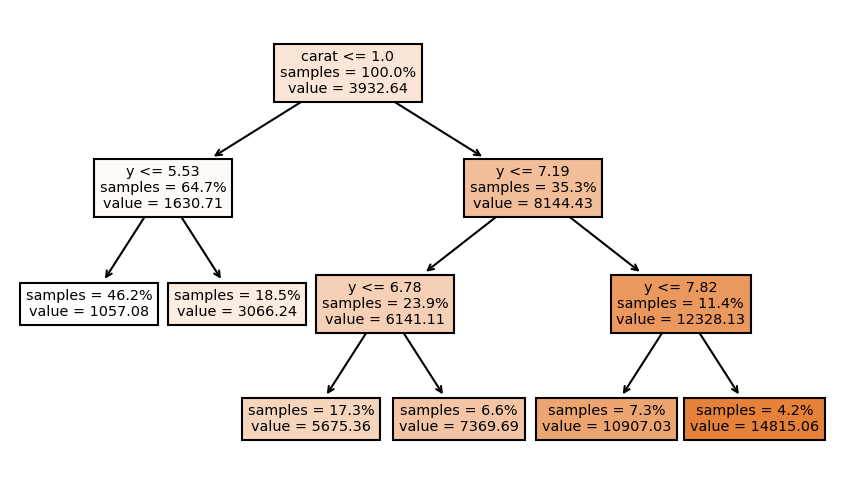

In [10]:
from matplotlib import pyplot as plt
from sklearn import tree

# cria e treina o modelo
modelo_dt = DecisionTreeRegressor(
    max_leaf_nodes=6,
    random_state=SEMENTE_ALEATORIA,
)
modelo_dt.fit(X_treino, y_treino)

# cria os objetos de figura e eixo
fig, axe = plt.subplots(
    ncols=1,
    nrows=1,
    figsize=(7, 4),
    dpi=150,
)

# plota o grafo da árvore de decisão
tree.plot_tree(
    modelo_dt,
    feature_names=FEATURES,
    ax=axe,
    impurity=False,
    filled=True,
    proportion=True,
    precision=2,
)

# mostra o plot para o usuário
plt.show()

No grafo acima, a seta da esquerda de cada vértice é seguida se a condição for verdadeira e a seta da direita é seguida se a condição for falsa.

Podemos também visualizar o modelo de forma textual.



In [11]:
from sklearn.tree import export_text

texto_dt = export_text(
    modelo_dt,
    feature_names=FEATURES,
    decimals=2,
)

print(texto_dt)

|--- carat <= 1.00
|   |--- y <= 5.53
|   |   |--- value: [1057.08]
|   |--- y >  5.53
|   |   |--- value: [3066.24]
|--- carat >  1.00
|   |--- y <= 7.19
|   |   |--- y <= 6.78
|   |   |   |--- value: [5675.36]
|   |   |--- y >  6.78
|   |   |   |--- value: [7369.69]
|   |--- y >  7.19
|   |   |--- y <= 7.82
|   |   |   |--- value: [10907.03]
|   |   |--- y >  7.82
|   |   |   |--- value: [14815.06]



## Referências e leitura adicional



1.  FACELI, Katti; LORENA, AC; GAMA, João; et al. Inteligência Artificial: uma abordagem de Aprendizado de Máquina. 2. ed., 2021
2.  [https://scikit-learn.org/stable/modules/tree.html#tree](https://scikit-learn.org/stable/modules/tree.html#tree)
3.  [https://www.youtube.com/playlist?list=PLblh5JKOoLUKAtDViTvRGFpphEc24M-QH](https://www.youtube.com/playlist?list=PLblh5JKOoLUKAtDViTvRGFpphEc24M-QH)
4.  [https://www.youtube.com/watch?v=W7MfsE5av0c](https://www.youtube.com/watch?v=W7MfsE5av0c)
5.  [https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
6.  [https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)
7.  [https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html)

